<a href="https://colab.research.google.com/github/Frasierzzz/DPDM2024/blob/main/Final_DPDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam

## Upload file and define varuable.

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
# prompt: read .pickle file from this path /content/drive/MyDrive/DPDM2024_Exam/Xnn_ppm.pickle

import pickle

with open('/content/drive/MyDrive/DPDM2024_Exam/Xnn_ppm.pickle', 'rb') as data: # 'rb' is read binary
  Metabolites = pickle.load(data)

In [201]:
import matplotlib.pyplot as plt
import numpy as np

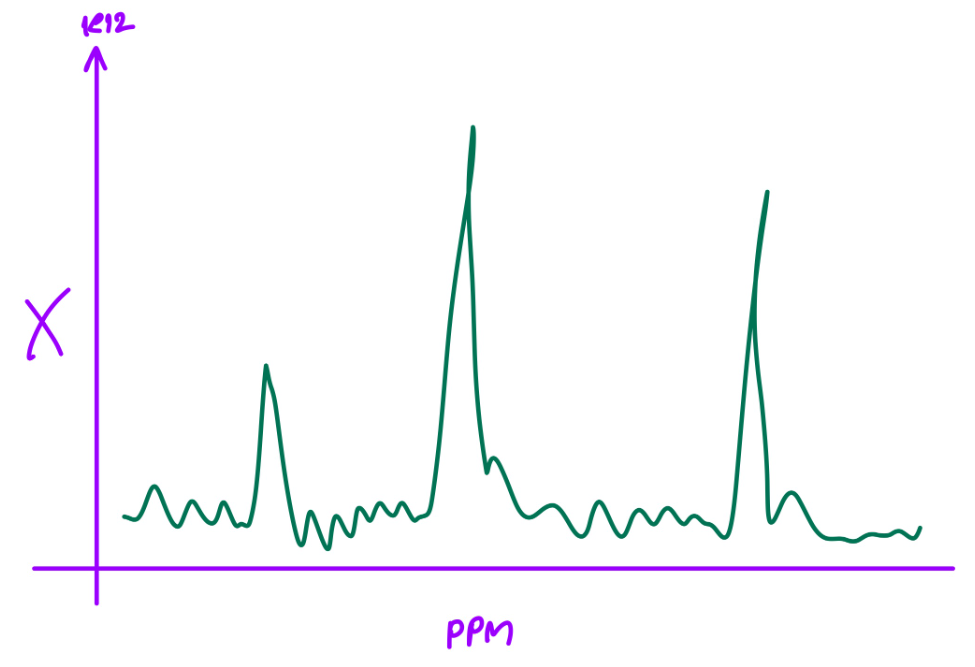

In [202]:
print(type(Metabolites),Metabolites[0].shape)
print(Metabolites)

<class 'tuple'> (51, 65536)
(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
         1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
       [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
         1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
       [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
        -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
       ...,
       [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
        -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
       [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
        -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
       [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
         1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]), array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
       -1.26045493, -1.26064005]))


In [203]:
# Chage data for plotting
intensity_data = Metabolites[0]
ppm_data = Metabolites[1]

In [204]:
print(intensity_data.shape,ppm_data.shape)

(51, 65536) (65536,)


In [205]:
intensity_data[:5]

array([[13698496.87862849, 13690427.85411995, 12788968.23910642, ...,
         1886684.39788299,  3117794.36625193,  3349504.        ],
       [ 8556799.93134524,  7907584.55473726,  7289756.67464252, ...,
         1365760.        ,  1365760.        ,  1365760.        ],
       [ 4740352.        ,  4740352.        ,  4740352.        , ...,
        -2022002.73927494, -2322528.39758231, -3078436.6363325 ],
       [ 7544576.        ,  7544576.        ,  7544576.        , ...,
         -199058.6111285 ,  -216373.32369451,  -216373.32369451],
       [11456256.        , 11456256.        , 11456256.        , ...,
        -1716670.97464988, -1660351.38318151, -1660351.38318151]])

In [206]:
ppm_data[:5]

array([10.87128   , 10.87109488, 10.87090976, 10.87072464, 10.87053952])

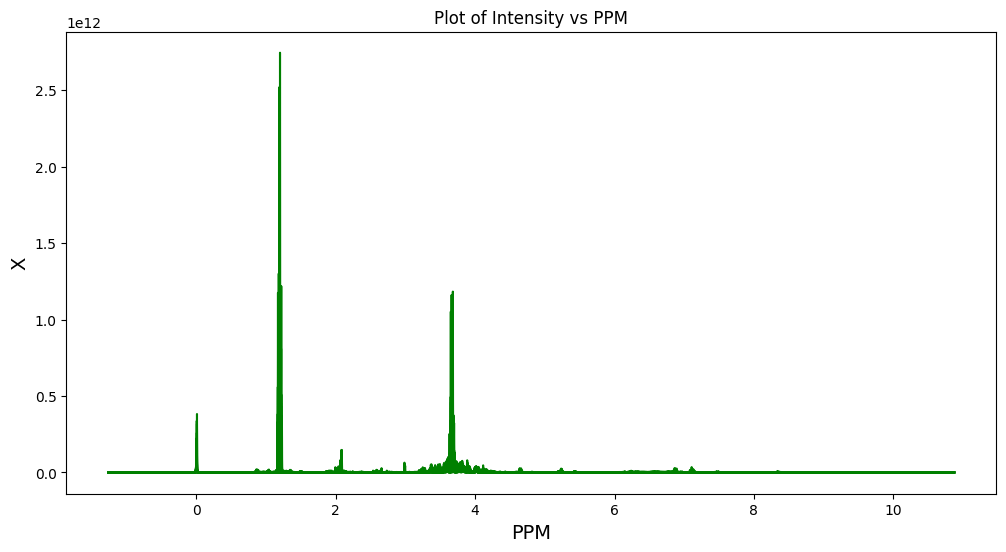

In [209]:
import matplotlib.pyplot as plt

# Plotting graph
plt.figure(figsize=(12, 6))

# Iterate through rows of intensity_data and plot each against ppm_data
for i in range(intensity_data.shape[0]):
    plt.plot(ppm_data, intensity_data[i, :], color='green')

plt.xlabel('PPM', fontsize=14)
plt.ylabel('X', fontsize=14)
plt.title('Plot of Intensity vs PPM') # Adding a title for better clarity
plt.show()

และนี่คือกราฟจริงๆ

## 0 Preprocess ข้อมูลตามคำแนะนำ

### 0.1 จัดการข้อมูลโดย ตัดข้อมูลที่อยู่นอกช่วงที่สนใจ ppm น้อยกว่า 0 และ มากกว่า 9.5

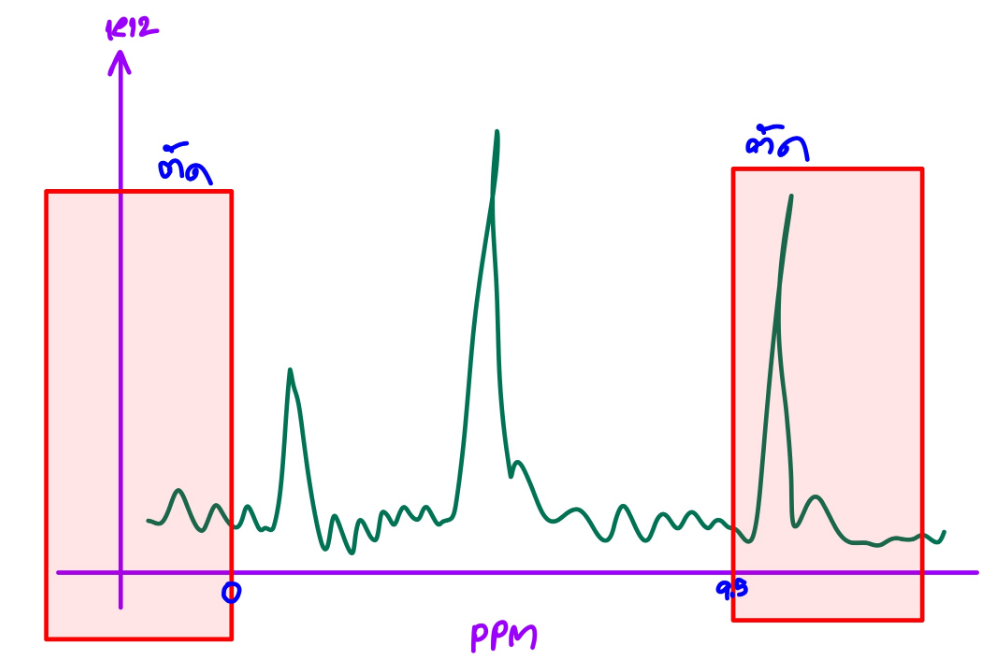

In [219]:
# Filter data to keep only ppm values in range [0, 9.5]
interval = (ppm_data >= 0) & (ppm_data <= 9.5)
filtered_ppm_data = ppm_data[interval]
filtered_intensity_data = intensity_data[:, interval]

In [223]:
print(filtered_ppm_data.shape,filtered_intensity_data.shape)

(51318,) (51, 51318)


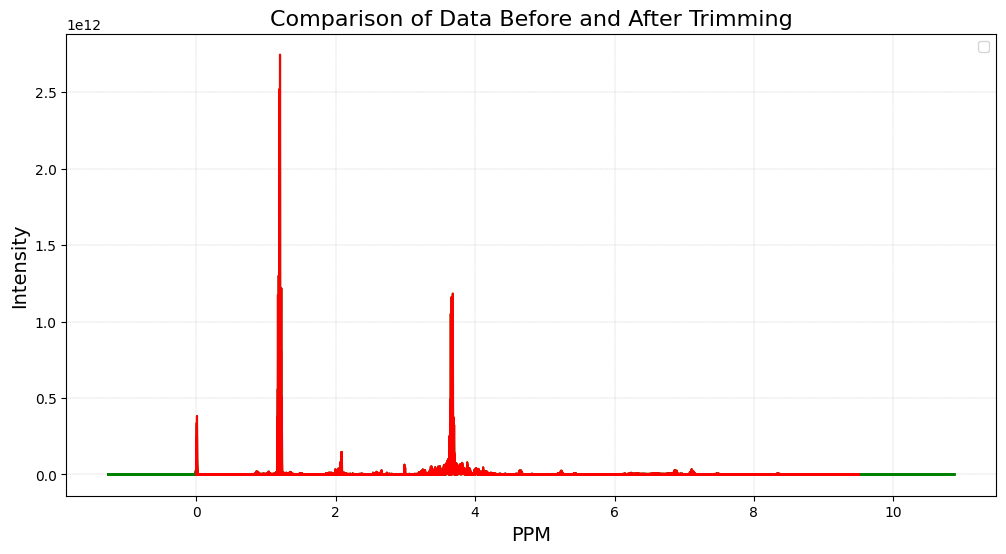

In [230]:
plt.figure(figsize=(12, 6))

for i in range(intensity_data.shape[0]):
    plt.plot(ppm_data, intensity_data[i, :], color='green')

for i in range(intensity_data.shape[0]):
    plt.plot(filtered_ppm_data,  filtered_intensity_data[i, :], color='red')

plt.xlabel('PPM', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Comparison of Data Before and After Trimming', fontsize=16)
plt.legend()

plt.grid(visible=True, which='both', linestyle='--', linewidth=0.25)
plt.show()


**ทำการตัดข้อมูลที่อยู่นอกช่วงที่สนใจนั่นคือ ppm น้อยกว่า 0 และ มากกว่า 9.5 เรียบร้อยแล้ว!**

### 0.2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

In [248]:
# ตั้งค่าขนาดใหม่ที่ต้องการ 51x400 = 20,400
num_points = 20400

# ตรวจสอบขนาดของข้อมูลที่กรอง
num_samples, num_features = filtered_intensity_data.shape

# คำนวณขนาดของกลุ่มใหม่
group_size = num_features // (num_points // num_samples)

In [249]:
# ทำ quantization โดยการหาค่าสูงสุดในแต่ละกลุ่มสำหรับ Intensity
quantized_intensity_data = [
    np.max(filtered_intensity_data[:, i:i + group_size], axis=1)
    for i in range(0, num_features, group_size)
]

# ตัดจำนวนให้เหลือเพียง 400 กลุ่ม
quantized_intensity_data = np.array(quantized_intensity_data[:400]).T

In [250]:
# ทำ quantization ค่า ppm โดยการหาค่าเฉลี่ยในแต่ละกลุ่ม
quantized_ppm_data = [
    np.mean(filtered_ppm_data[i:i + group_size])
    for i in range(0, num_features, group_size)
]

# ตัดจำนวนให้เหลือเพียง 400 กลุ่ม
quantized_ppm_data = np.array(quantized_ppm_data[:400])

In [251]:
# ทำให้ quantized_ppm_data ซ้ำกัน 51 ครั้ง เพื่อให้มีขนาด (51, 400)
quantized_ppm_data = np.tile(quantized_ppm_data, (51, 1))

# แสดงขนาดของข้อมูลที่ quantize แล้ว
print("Quantized PPM shape:", quantized_ppm_data.shape)
print("Quantized Intensity shape:", quantized_intensity_data.shape)

Quantized PPM shape: (51, 400)
Quantized Intensity shape: (51, 400)


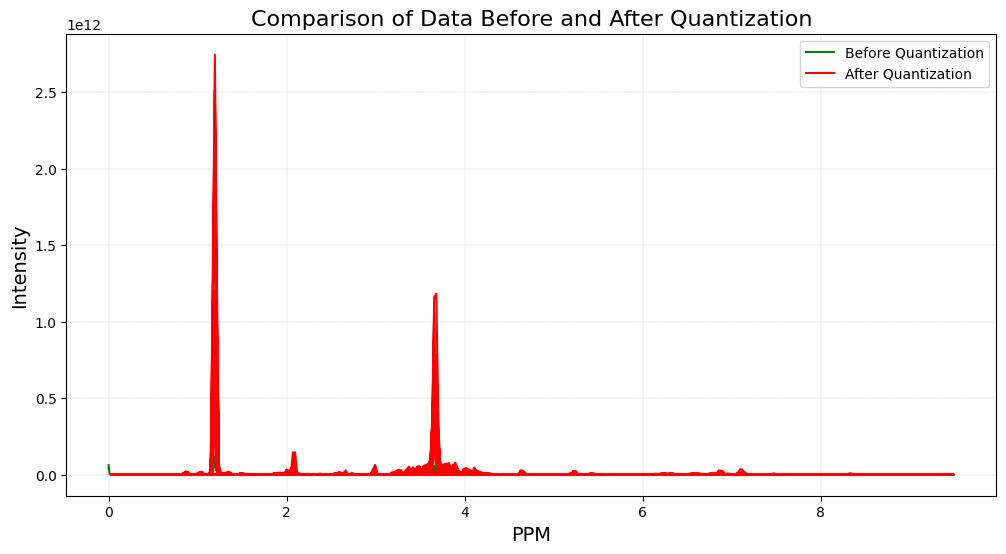

In [252]:
# พล็อตกราฟเปรียบเทียบก่อนและหลังทำ quantization
plt.figure(figsize=(12, 6))

# พล็อตก่อนการทำ quantization (ค่าเฉลี่ยของทุกตัวอย่าง)
plt.plot(filtered_ppm_data, np.mean(filtered_intensity_data, axis=0), color='green', label='Before Quantization')

# พล็อตหลังการทำ quantization
plt.plot(quantized_ppm_data.flatten(), quantized_intensity_data.flatten(), color='red', label='After Quantization')

plt.xlabel('PPM', fontsize=14)
plt.ylabel('Intensity', fontsize=14)
plt.title('Comparison of Data Before and After Quantization', fontsize=16)
plt.legend()

plt.grid(visible=True, which='both', linestyle='--', linewidth=0.25)
plt.show()

## 1 หาทาง visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

In [261]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ปรับการแบ่งกลุ่มโดยใช้ค่ามัธยฐาน
threshold = np.median(np.mean(quantized_intensity_data, axis=1))
labels = np.where(np.mean(quantized_intensity_data, axis=1) > threshold, 'High', 'Low')

In [262]:
print("จำนวนกลุ่ม High:", np.sum(labels == 'High'))
print("จำนวนกลุ่ม Low:", np.sum(labels == 'Low'))

จำนวนกลุ่ม High: 25
จำนวนกลุ่ม Low: 26


In [263]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1610, max_depth=5, min_samples_split=10)
clf.fit(quantized_intensity_data, labels)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=1610)

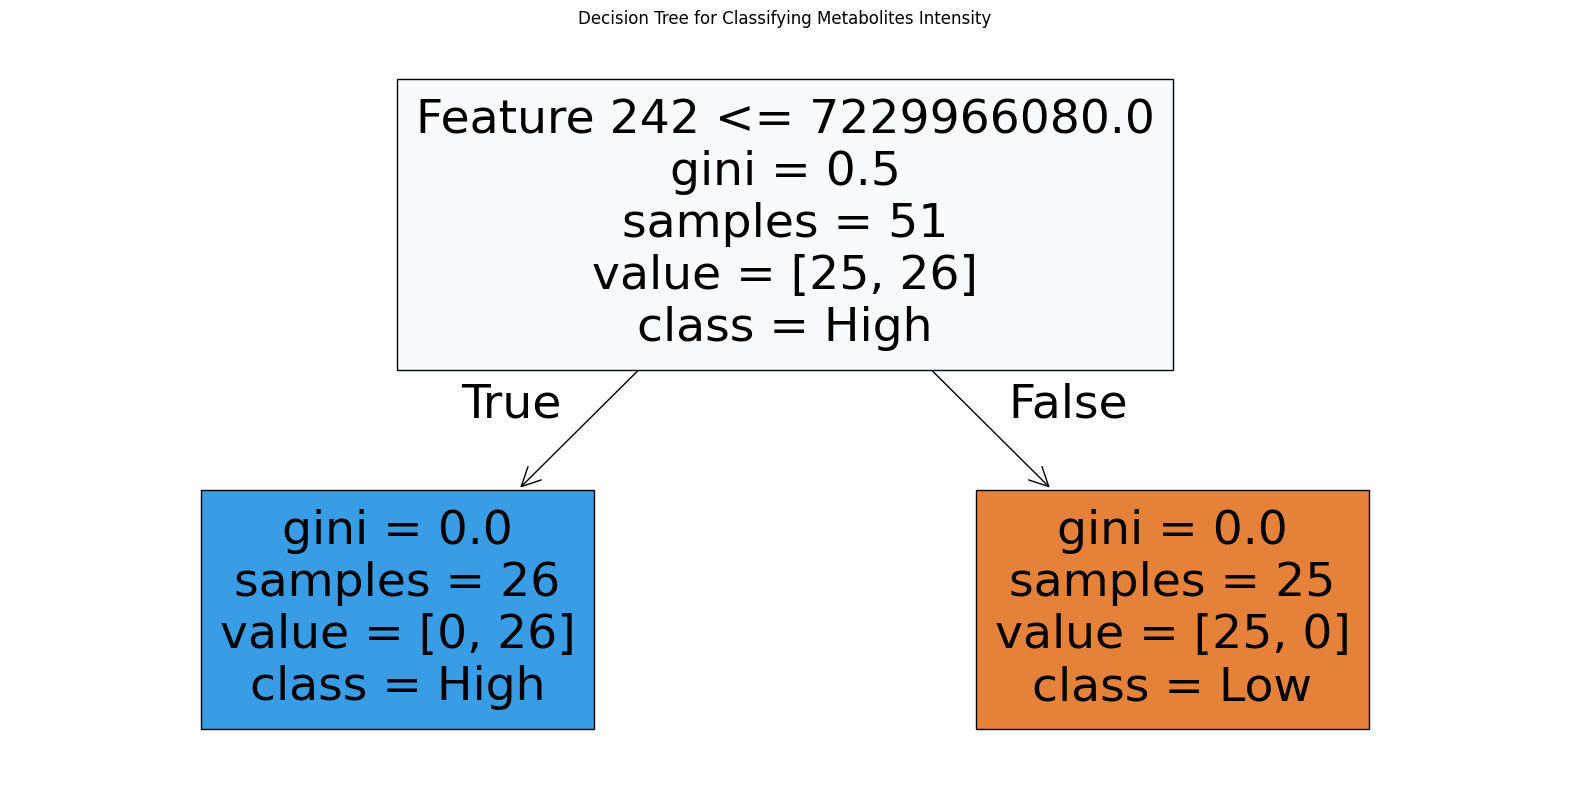

In [264]:
# Show Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[f'Feature {i+1}' for i in range(quantized_intensity_data.shape[1])], class_names=['Low', 'High'])
plt.title('Decision Tree for Classifying Metabolites Intensity')
plt.show()

## 2 วิเคราะห์ว่าข้อมูลทั้ง 51 จุด มาจากสาร metabolites ทั้งหมดกี่กลุ่ม (ด้วย K-mean clustering และ Hierachical clustering)

quantized_ppm_data, quantized_intensity_data

In [265]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

ทำ K-Means clustering ก่อน

In [277]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(quantized_intensity_data)

In [278]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=1610) # เลือก 3 เพราะจากข้อที่ 3.1
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 2], dtype=int32)

In [279]:
# prompt: show index that's groupby kmeans_labels

# Group the data by kmeans_labels and show the index
for label in np.unique(kmeans_labels):
  indices = np.where(kmeans_labels == label)[0]
  print(f"Cluster {label}: Indices {indices}")

Cluster 0: Indices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 35 48]
Cluster 1: Indices [31 36 38 40 41 45]
Cluster 2: Indices [32 33 34 37 39 42 43 44 46 47 49 50]


ต่อมาทำ Hierachical clustering

In [280]:
# Standardize the data
scaler2 = StandardScaler()
data_scaled2 = scaler.fit_transform(quantized_intensity_data)

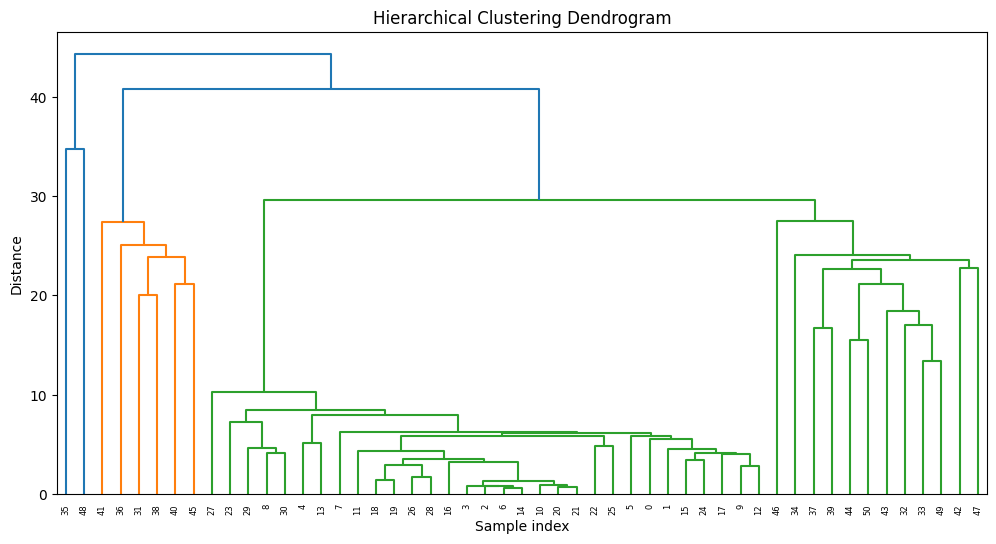

In [281]:
# Hierarchical clustering dendrogram
hierarchical_linkage = linkage(data_scaled2, method='average')

# Plotting dendrogram
plt.figure(figsize=(12, 6))
dendrogram(hierarchical_linkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [282]:
# prompt: show index that groupby hierarchical_linkage

# Get the cluster labels from the hierarchical clustering
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(hierarchical_linkage, t=3, criterion='maxclust')

# Print the index of each cluster
for i in range(1, 4):
  print(f"Cluster {i}: {np.where(cluster_labels == i)[0]}")

Cluster 1: [35 48]
Cluster 2: [31 36 38 40 41 45]
Cluster 3: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 37 39 42 43 44 46 47 49 50]


ลองทำ Hierachical clustering อีกอัน

In [283]:
# Standardize the data
scaler3 = StandardScaler()
data_scaled3 = scaler.fit_transform(quantized_intensity_data)

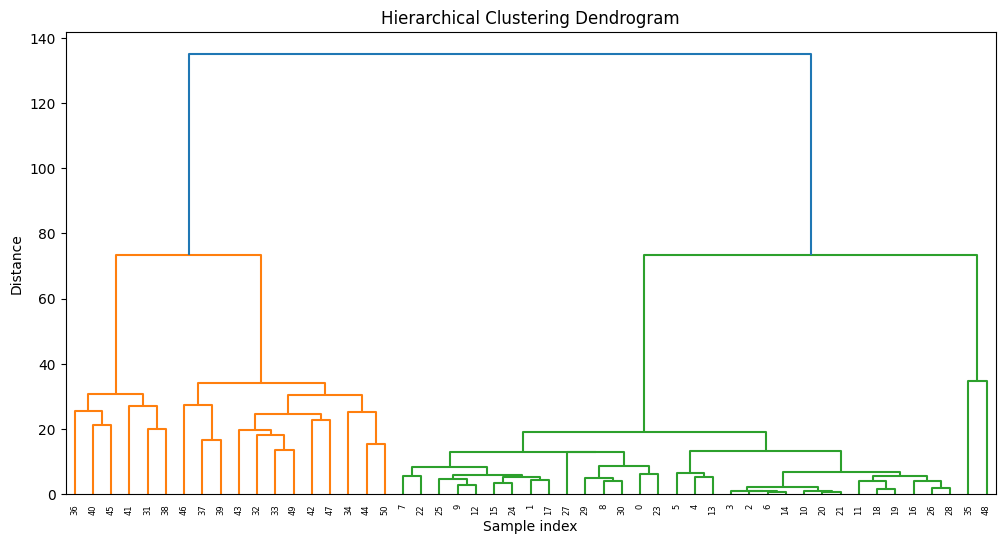

In [284]:
# Hierarchical clustering dendrogram
hierarchical_linkage2 = linkage(data_scaled3, method='ward')

# Plotting dendrogram
plt.figure(figsize=(12, 6))
dendrogram(hierarchical_linkage2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [276]:
# prompt: show index that groupby hierarchical_linkage2

# Get the cluster labels from the hierarchical clustering
from scipy.cluster.hierarchy import fcluster

cluster_labels2 = fcluster(hierarchical_linkage2, t=3, criterion='maxclust')

# Print the index of each cluster
for i in range(1, 4):
  print(f"Cluster {i}: {np.where(cluster_labels2 == i)[0]}")

Cluster 1: [31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 49 50]
Cluster 2: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Cluster 3: [35 48]
